In [6]:
from pandas_datareader import data as pdr
import pandas as pd

tickers = ["SPY", "QQQ", "TLT"]

prices = pd.DataFrame()

for ticker in tickers:
    df = pdr.DataReader(ticker, "stooq", start="2019-01-01")
    prices[ticker] = df["Close"]

prices = prices.sort_index()
prices.head()

,SPY,QQQ,TLT
Date,,,
2019-01-02,226.929,148.595,103.519
2019-01-03,221.503,143.745,104.713
2019-01-04,228.938,149.880,103.483
2019-01-07,230.757,151.704,103.182
2019-01-08,232.902,153.066,102.917


In [7]:
returns = prices.pct_change().dropna()
returns.head()

,SPY,QQQ,TLT
Date,,,
2019-01-03,-0.023911,-0.032639,0.011534
2019-01-04,0.033566,0.042680,-0.011746
2019-01-07,0.007945,0.012170,-0.002909
2019-01-08,0.009295,0.008978,-0.002568
2019-01-09,0.004766,0.008075,-0.001516


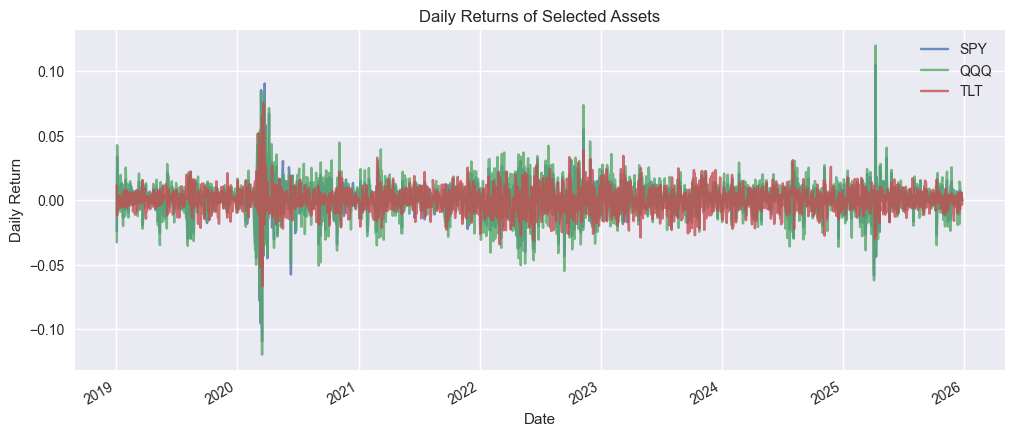

In [8]:
returns.plot(figsize=(12, 5), alpha=0.8)
plt.title("Daily Returns of Selected Assets")
plt.ylabel("Daily Return")
plt.show()

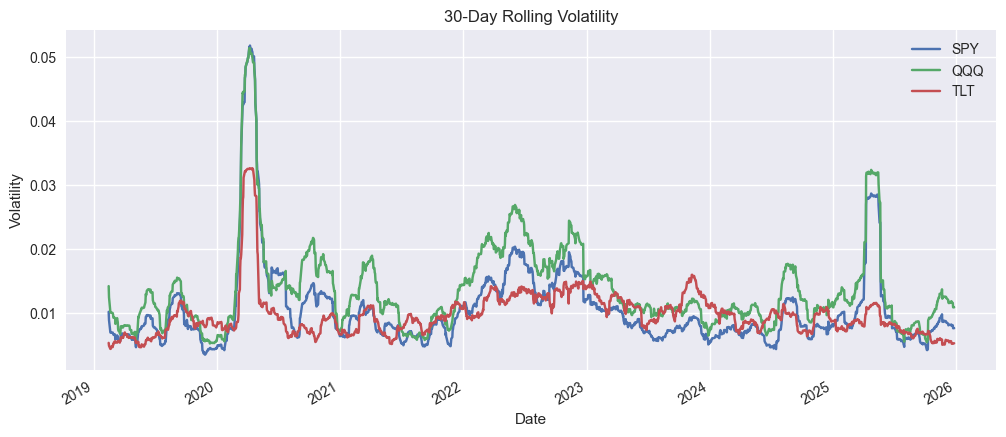

In [9]:
rolling_vol = returns.rolling(window=30).std()

rolling_vol.plot(figsize=(12, 5))
plt.title("30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()

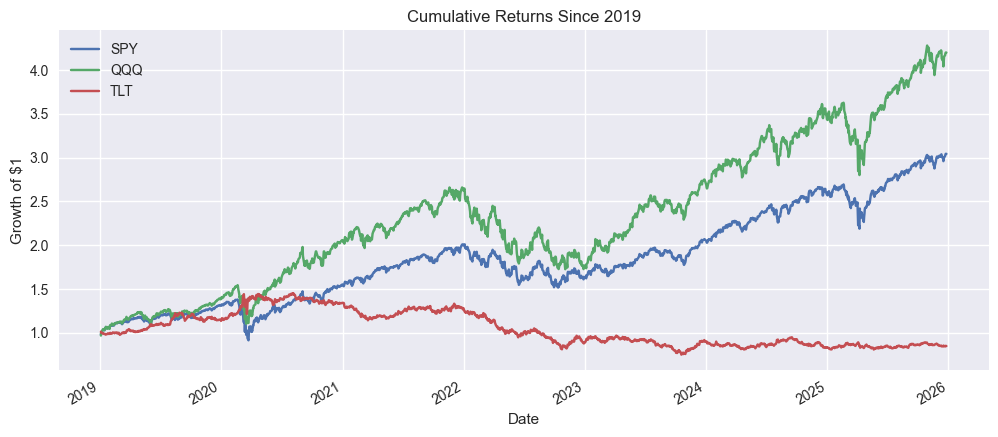

In [10]:
cumulative_returns = (1 + returns).cumprod()

cumulative_returns.plot(figsize=(12, 5))
plt.title("Cumulative Returns Since 2019")
plt.ylabel("Growth of $1")
plt.show()

In [11]:
correlation = returns.corr()
correlation

,SPY,QQQ,TLT
SPY,1.000000,0.936832,-0.143122
QQQ,0.936832,1.000000,-0.093934
TLT,-0.143122,-0.093934,1.000000


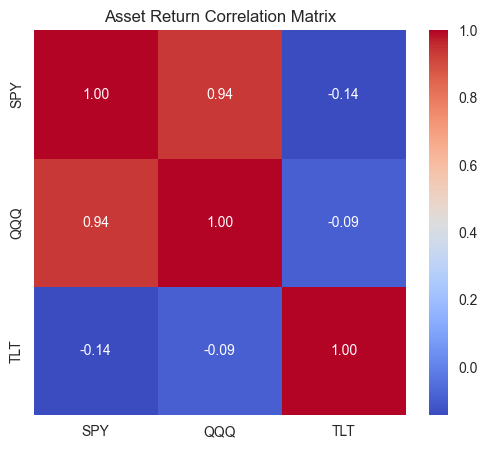

In [12]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Asset Return Correlation Matrix")
plt.show()

In [13]:
# Calculate cumulative returns (if not already defined)
cumulative_returns = (1 + returns).cumprod()

# Calculate rolling maximum
rolling_max = cumulative_returns.cummax()

# Calculate drawdown
drawdown = cumulative_returns / rolling_max - 1

drawdown.head()

,SPY,QQQ,TLT
Date,,,
2019-01-03,0.0,0.0,0.000000
2019-01-04,0.0,0.0,-0.011746
2019-01-07,0.0,0.0,-0.014621
2019-01-08,0.0,0.0,-0.017152
2019-01-09,0.0,0.0,-0.018641


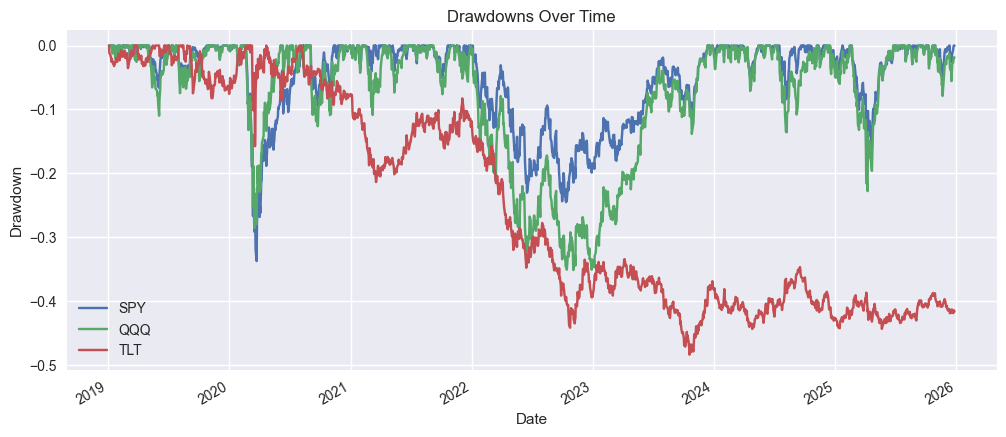

In [14]:
drawdown.plot(figsize=(12, 5))
plt.title("Drawdowns Over Time")
plt.ylabel("Drawdown")
plt.show()

In [15]:
max_drawdown = drawdown.min()
max_drawdown

SPY   -0.337154
QQQ   -0.351197
TLT   -0.483507
dtype: float64